# Log-log and Semi-log Demand Curves

In [2]:
# HIDDEN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from matplotlib import patches
from datascience import *
%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

So far, we have examined demand curves assuming that they were linear. Specifically, we've assumed that the relationship between quantity demanded and price was linear: for a \$1 change in price, we can expect a fixed change in units demanded at any price level.

Is this intuitively true? Probably not. For example, a \$1 decrease from \$100 is trivial compared to a \$1 decrease from an original price of \$2. As humans, we think about changes as proportions, and this fact should be reflected in the supply and demand curves. What this implies is that these curves should be exponential in nature: at higher prices, a larger change in price will yield the same change quantity as compared to that in lower prices. 

Perhaps a better model for demand, then, is that a 1\% change in price will lead to a fixed absolute change in units demanded, or a fixed percentage change in units demanded. To model this, we turn to log-log and semi-log demand curves, respectively.



## Using Logarithms for Proportional Changes

Before we jump into our new demand models, we must first go over measuring proportional changes.
To highlight this fact, let's actually consider how the variable GDP behaves. GDP tends to grow by a certain percent each year; no one is particularly interested in how *much* GDP changes from one year to the next, or from one country to another, but rather by *what percent* it changes.

If you were to plot GDP over time for a country, it might look something like this:

[Following image is a line of increasing upward sloping growth of GDP over time]

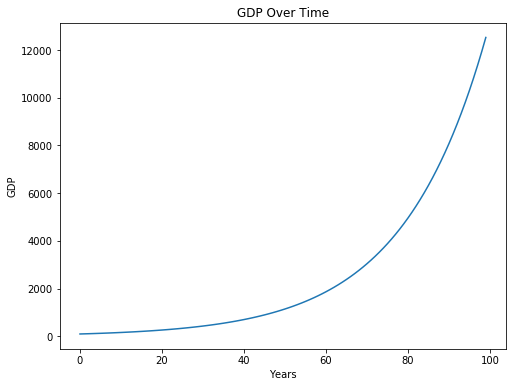

In [3]:
GDPs = make_array(100)

for _ in np.arange(99):
    GDPs = np.append(GDPs, GDPs.item(-1) * 1.05)
    
plt.figure(figsize=(8,6))
plt.plot(np.arange(100), GDPs)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP Over Time');

The starting value for GDP is 100, and GDP grows by 5 percent each year. Look at how how much GDP grows in the later years!


While this phenomenon is impressive, it is misleading. At surface level, it seems to imply that something different happened at around year 50 or so that caused GDP to increase considerably in subsequent years. We know that this isn't true, and that this is just a consequence of exponential growth.

To counter this effect, **for variables that tend to vary from one observation to the next by proportions rather than absolute amounts, we take the natural log of these variables**. Let's do that for GDP:

[Following image is a line of constant upward sloping growth of GDP over time]

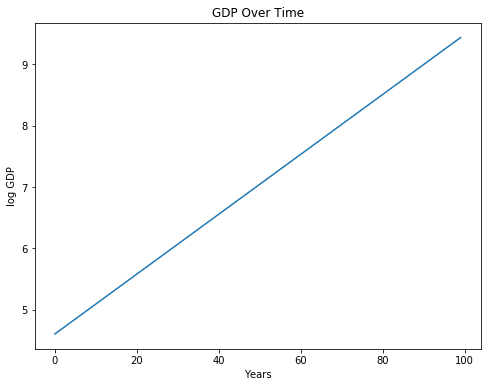

In [4]:
ln_GDPs = np.log(GDPs)

plt.figure(figsize=(8,6))
plt.plot(np.arange(100), ln_GDPs)
plt.xlabel('Years')
plt.ylabel('log GDP')
plt.title('GDP Over Time');

We've now uncovered a linear relationship between years and GDP! You can interpret the slope of this line as the approximate factor that GDP increases by for an increase in one year. If we want the percentage change in GDP for an increase in one year, we can multiply by 100. (You will later see why the slope is not exactly 0.05). To verify:

In [13]:
print('Slope between years 0 and 1: ', ln_GDPs[1] - ln_GDPs[0])

Slope between years 0 and 1:  0.04879016416943127


To generalize our results, taking the natural log of a variable allows us to interpret its change as a percentage change instead of an absolute change. Using our GDP example from above, the slope after taking the natural log of GDP is now roughly equal to:

$$\text{slope} = \frac{\text{% change in GDP}}{\text{Change in time (1 year)}} \approx \frac{\text{Change in log-GDP} \times 100}{\text{Change in time (1 year)}} $$

## Semi-log Demand Curves

Revisiting demand curves, suppose that a change in price by $1 leads to a change in quantity demanded by a factor of $m$. This means that our slope would be:

$$\text{slope} = \frac{\text{change in quantity by a factor of } m}{\text{ \$1 change in price}} \approx \frac{m \text{ change in log-quantity}}{\text{\$1 change in price}}$$

Using our intuition from above, we simply have to log transform our quantity-demanded variable to capture the above relationship. This is known as the semi-log demand curve, in which the price and log-quantity are linearly related:

$$\ln{D(P)} = m\cdot P + b$$

Let's gain some more intuition of this relationship. By exponentiating both sides, this is equivalent to:

$$\begin{align*}
D(P) &= e^{m\cdot P + b}\\
&= e^be^{m\cdot P } \\
\end{align*}$$

This rewriting provides us some intuition on the interpretation of $m$ and $b$, the slope and intercept terms in the semi-log relationship. $b$ (specifically $e^b$) corresponds to the 'baseline' quantity demanded when price is 0, since $e^{m \cdot P} = e^0 = 1$. 

$m$ corresponds roughly to how much a one dollar change in price will lead to a percentage change in quantity demanded. To see this, imagine that P goes up by one dollar such that we have:

$$
\begin{align*}
D(P+1) &= e^be^{m \cdot (P+1) }  \\
&= e^be^{m + m \cdot P }\\
&= e^be^me^{m \cdot P }\\
&= e^mD(P) \\
&\approx (1+m)D(P)
\end{align*}$$

The last line relies on the fact $e^{x} \approx (1+x)$ when $x$ is small. This is why in our GDP example, our slope was not exactly 0.05. Thus, our results leads to the caveat that our transformation is only approximate and only valid when our $m$ is small. Typically, we do not want $m$ to be larger than $0.2$, or else the approximation will start to diverge.

### Visualizing the semi-log relationship
From above, we can convert the linear semi-log relationship into non-log terms for price and quantity, ultimately getting $D(P) = e^be^{m\cdot P}$. Plotting this relationship, we get:

[Following image is a line of downward sloping semi-log Demand]

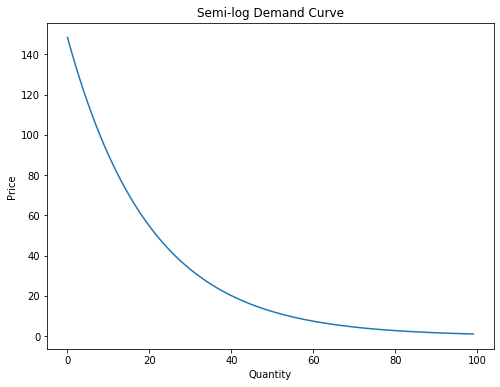

In [47]:
m = -0.05
b = 5

x = np.arange(0,100)
y = (np.e ** (x * m)) * (np.e ** b)

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Semi-log Demand Curve');

## Log-log Demand Curves

Now suppose that a 1% change in price leads to an $m$% change in quantity demanded. This means that our slope would be:

$$\text{slope} = \frac{m * \text{pct change in quantity}}{1 \text{pct change in price}} \approx \frac{0.01m \text{ change in log-quantity}}{0.01 \text{ change in log-price}}$$

In this case, we have to log transform both our quantity-demanded variable as well as price variable to capture the above relationship. This is known as the log-log demand curve, in which the log-price and log-quantity are linearly related:

$$\ln{D(P)} = m\cdot\ln{P} + b$$

Let's gain some more intuition of this relationship. By exponentiating both sides, this is equivalent to:

$$\begin{align*}
D(P) &= e^{m\cdot\ln{P} + b}\\
&= e^be^{m\cdot\ln{P}} \\
&= e^b(e^{\ln{P}})^m \\
&= e^bP^m \\
\end{align*}$$

In this setup, $b$ does not have as clear a meaning. For $m$, we can suppose that $P$ goes up by one percent:

$$\begin{align*}
D(1.01P) &= e^b(1.01P)^m \\
&= e^b 1.01^m P^m\\
&= 1.01^m D(P) \\
&\approx (1 + 0.01m) D(P) 
\end{align*}$$

Where we utilize the approximation that $1.01^m \approx 1 + 0.01m$. Our caveat from the previous section about $m$ not being large continues to be in place here: typically, we do not want our $m$ to be larger than 30 (where $1.01^{30}\approx 1.35$), or else the approximation will fall apart.



### Visualizing the log-log relationship
From above, we can convert the linear log-log relationship into non-log terms for price and quantity, ultimately getting $D(P) = e^bP^m$. Plotting this relationship, we can see a demand curve that looks somewhat like an exponential decay curve:

[Following image is a line of downward sloping log-log Demand]

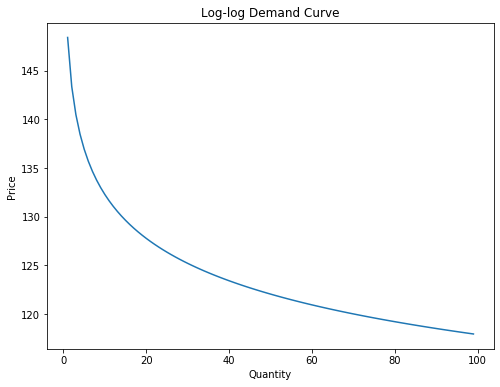

In [46]:
m = -0.05
b = 5

x = np.arange(0,100)
y = (x ** m) * (np.e ** b)

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Log-log Demand Curve');

A caveat about our model: since our model is ultimately linear between log-price and log-quantity, the slope is always the same. This means that at any price level, we assume a 1% change in price will yield the same percentage change in quantity. This is also known as fixed elasticities -- a topic we will dive in on the next page.

## Revisiting Avocados
We will revisit the avocados dataset from the previous page, which features historical data on non-organic avocado prices and sales volumes in San Francisco from 2015 to 2018. 


In [101]:
avocados = Table.read_table("avocados.csv") # is it avocados or avocadoes?
avocados

Date,Average Price,Total Volume
2015-12-27,1.05,692206
2015-12-20,1.15,637091
2015-12-13,1.22,616016
2015-12-06,1.06,694982
2015-11-29,1.05,651639
2015-11-22,1.04,709444
2015-11-15,0.99,775849
2015-11-08,1.4,599884
2015-11-01,0.97,869927
2015-10-25,1.55,561342


Taking a look at the natural relationship between price and volume sold, we see a possible exponentially decaying relationship between volume and price. We will try using both semi-log and log-log transformations on the data.

[Following image is a scatter plot of Volume vs Price ]

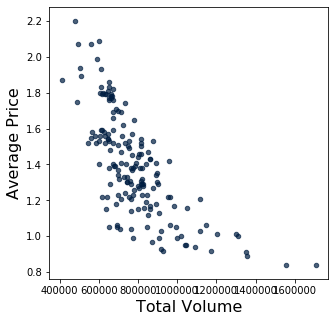

In [102]:
avocados.scatter("Total Volume", "Average Price")

### Semi-log

In [103]:
log_quantity = np.log(avocados.column("Total Volume"))

slope, intercept = np.polyfit(avocados.column("Average Price"), log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.5792670374517227
The intercept is:  14.352506861683818


Interpreting the slope, we get that for every one dollar change in price of avocados, we would expect the change in quantity demanded to decrease by 57%. Take this result with a grain of salt – recall that our approximation typically is valid for small values of $m$, and here our $m=-0.57$. 

Now, let's plot our semi-log demand curve. First, we will plot it on an axes in which the quantity is log-transformed, exhibiting a linear demand curve:

[Following image is a straight line of downward sloping semi-log Demand]


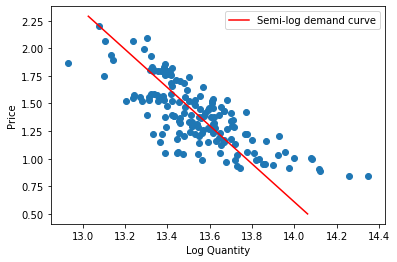

In [104]:
plt.scatter(log_quantity, avocados.column("Average Price"))
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Log Quantity")
plt.ylabel("Price")
plt.legend();

Next, let's plot our semi-log demand curve in which neither axis is log-transformed:

[Following image is a curved line of downward sloping semi-log Demand]


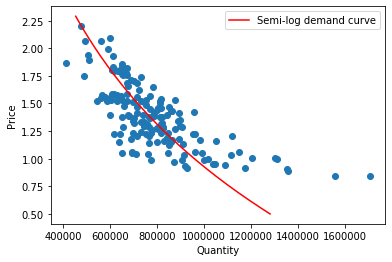

In [105]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.5, 2.3, 0.01)
predicted_quantities = np.e ** (slope * prices + intercept)
plt.plot(predicted_quantities, prices, color = 'red', label = "Semi-log demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

### Log-log

In [106]:
log_quantity = np.log(avocados.column("Total Volume"))
log_price = np.log(avocados.column("Average Price"))

slope, intercept = np.polyfit(log_price, log_quantity, 1)
print("The slope is: ", slope)
print("The intercept is: ", intercept)

The slope is:  -0.8157285894758461
The intercept is:  13.798460905495737


Interpreting the slope, we get that for every 1% change in price of avocados, we would expect the change in quantity demanded to decrease by $-0.816\%$. Once again, keep in mind that our approximation typically is valid for small values of $m$, and here our $m=-0.816$.  

Plotting our log-log demand curve with both axes log-transformed, we observe a linear demand curve:

[Following image is a straight line of downward sloping log-log Demand]


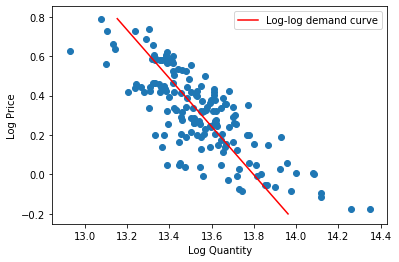

In [107]:
plt.scatter(log_quantity, log_price)
prices = np.arange(-0.2, 0.8, 0.01)
predicted_quantities = slope * prices + intercept
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")

plt.xlabel("Log Quantity")
plt.ylabel("Log Price")
plt.legend();

Finally, let's plot our log-log demand curve in which neither axis is log-transformed:

[Following image is a curved line of downward sloping log-log Demand]


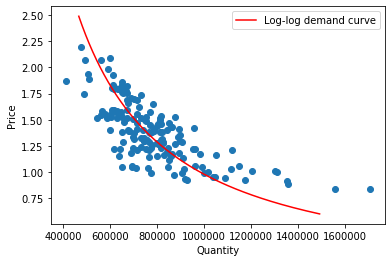

In [108]:
plt.scatter(avocados.column("Total Volume"), avocados.column("Average Price"))
prices = np.arange(0.6, 2.5, 0.01)
predicted_quantities = (np.e ** intercept) * (prices ** slope)
plt.plot(predicted_quantities, prices, color = 'red', label = "Log-log demand curve")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend();

Which model is better: semi-log or log-log? There is no correct answer here, in fact justifying one approach over another is surprisingly profound. One way to approach this is to look at the graphs produced above and which red line goes through our data points "best" (but what does "best" mean? We'll save this for another day...). Another approach is to utilize our real-world knowledge to conclude which relationship is more accurate: do consumers react similarly to price changes that are in a proportion manner or in a absolute manner? This may also depend on the price, the promotion around it, the product itself, and many other factors. 

This example highlights how ambiguity is a big part of doing data science. We can approach ambiguity with statistical methods and with domain knowledge. Either way, as long as you can ultimately justify your approach, that is what is key in conducting robust data science. 